In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Importation des données

In [3]:
data = pd.read_csv('/Users/morganjowitt/Desktop/MOSEF/scoring/Projet_scoring/data/hmeq.csv')
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


# Distribution des variables

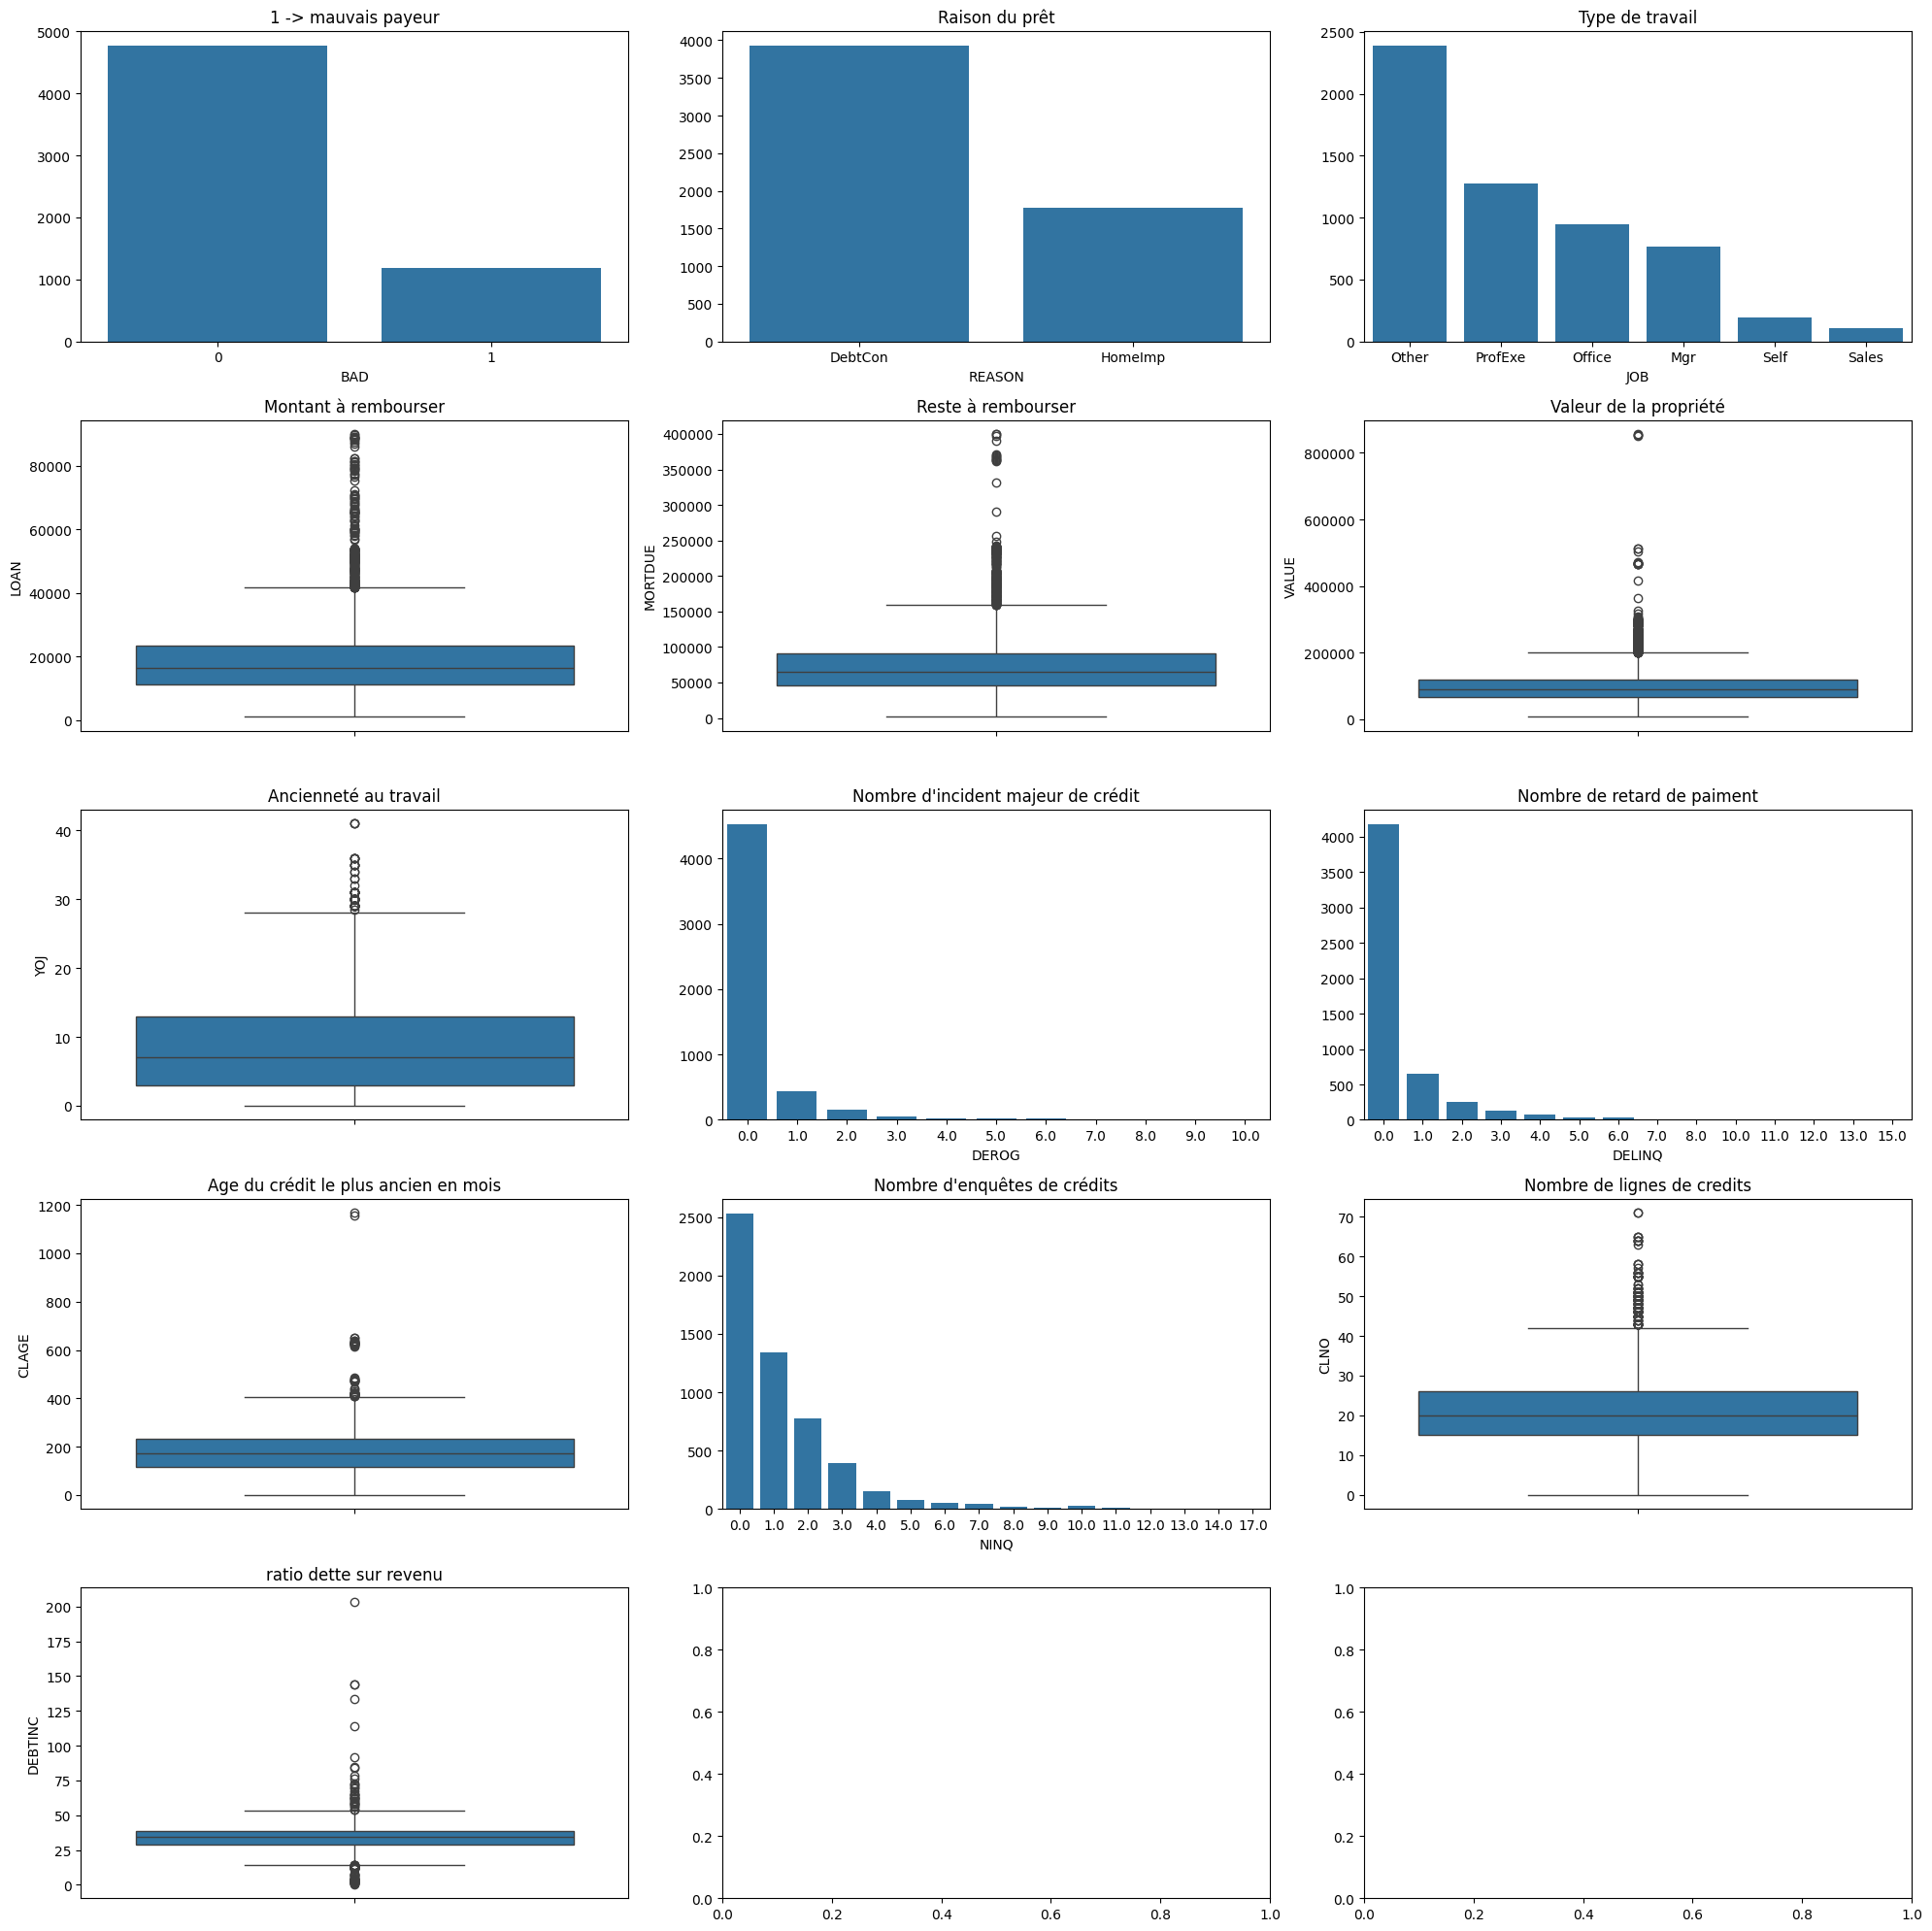

In [4]:
fig, axes = plt.subplots(5, 3, figsize=(20, 20))

df1=data['BAD'].value_counts()
sns.barplot(x=df1.index, y=df1.values, ax=axes[0,0])
axes[0,0].set_title('1 -> mauvais payeur')

df2=data['REASON'].value_counts()
sns.barplot(x=df2.index, y=df2.values, ax=axes[0,1])
axes[0,1].set_title('Raison du prêt')

df3=data['JOB'].value_counts()
sns.barplot(x=df3.index, y=df3.values, ax=axes[0,2])
axes[0,2].set_title('Type de travail')

sns.boxplot(y=data['LOAN'],ax=axes[1,0])
axes[1,0].set_title('Montant à rembourser')

sns.boxplot(y=data['MORTDUE'],ax=axes[1,1])
axes[1,1].set_title('Reste à rembourser')

sns.boxplot(y=data['VALUE'],ax=axes[1,2])
axes[1,2].set_title('Valeur de la propriété')

sns.boxplot(y=data['YOJ'],ax=axes[2,0])
axes[2,0].set_title('Ancienneté au travail')

df5=data['DEROG'].value_counts()
sns.barplot(x=df5.index, y=df5.values, ax=axes[2,1])
axes[2,1].set_title("Nombre d'incident majeur de crédit")

df6=data['DELINQ'].value_counts()
sns.barplot(x=df6.index, y=df6.values, ax=axes[2,2])
axes[2,2].set_title('Nombre de retard de paiment')

sns.boxplot(y=data['CLAGE'],ax=axes[3,0])
axes[3,0].set_title('Age du crédit le plus ancien en mois')

df7=data['NINQ'].value_counts()
sns.barplot(x=df7.index, y=df7.values, ax=axes[3,1])
axes[3,1].set_title("Nombre d'enquêtes de crédits")

sns.boxplot(y=data['CLNO'],ax=axes[3,2])
axes[3,2].set_title('Nombre de lignes de credits')

sns.boxplot(y=data['DEBTINC'],ax=axes[4,0])
axes[4,0].set_title('ratio dette sur revenu')

plt.tight_layout()
plt.show()


# Matrice de correlation

<Axes: >

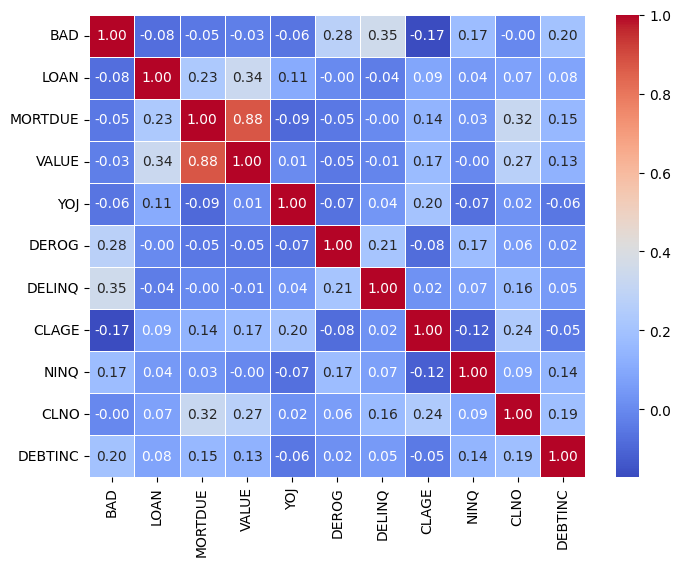

In [5]:

data_num=data.select_dtypes(include=["float","int"])

correlation_matrix=data_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Analyse de la covariance pour les variables catégorielles

<Axes: xlabel='REASON', ylabel='count'>

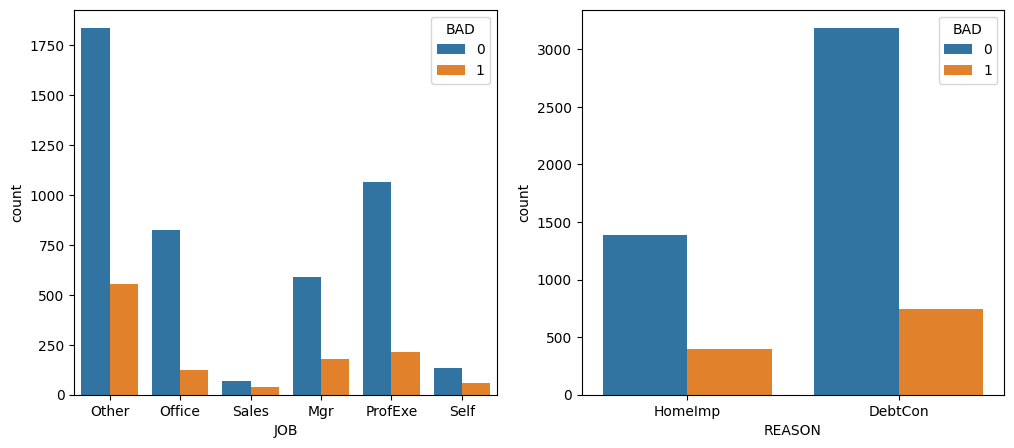

In [6]:
data_cat=pd.concat([data.select_dtypes(include='object'),data_num['BAD']],axis=1)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='JOB', hue='BAD', data=data_cat,ax=axes[0])
sns.countplot(x='REASON', hue='BAD', data=data_cat,ax=axes[1])

C'est compliqué d'analyser ces barplots sans pourcentage, de plus certaines valeurs par exemple pour JOB sont sous-représentés donc potentiellement pas pertinent de les analyser

# Analyse de correlation entre deux variables et la variable cible

In [7]:
def plot_scatter(var_1, var_2, var_bin, axe_i,axe_j):
    # Points avec var_bin == 0 (en vert)
    axes[axe_i, axe_j].scatter(data[var_1][data[var_bin] == 0], data[var_2][data[var_bin] == 0], color='green', label='var_bin = 0')
    # Points avec var_bin == 1 (en rouge)
    axes[axe_i, axe_j].scatter(data[var_1][data[var_bin] == 1], data[var_2][data[var_bin] == 1], color='red', label='var_bin = 1')
    axes[axe_i, axe_j].set_title(f'{var_2} en fonction du {var_1}')
    
print(data['LOAN'][data['BAD'] == 0])

4        1700
13       2000
19       2300
26       2400
29       2500
        ...  
5955    88900
5956    89000
5957    89200
5958    89800
5959    89900
Name: LOAN, Length: 4771, dtype: int64


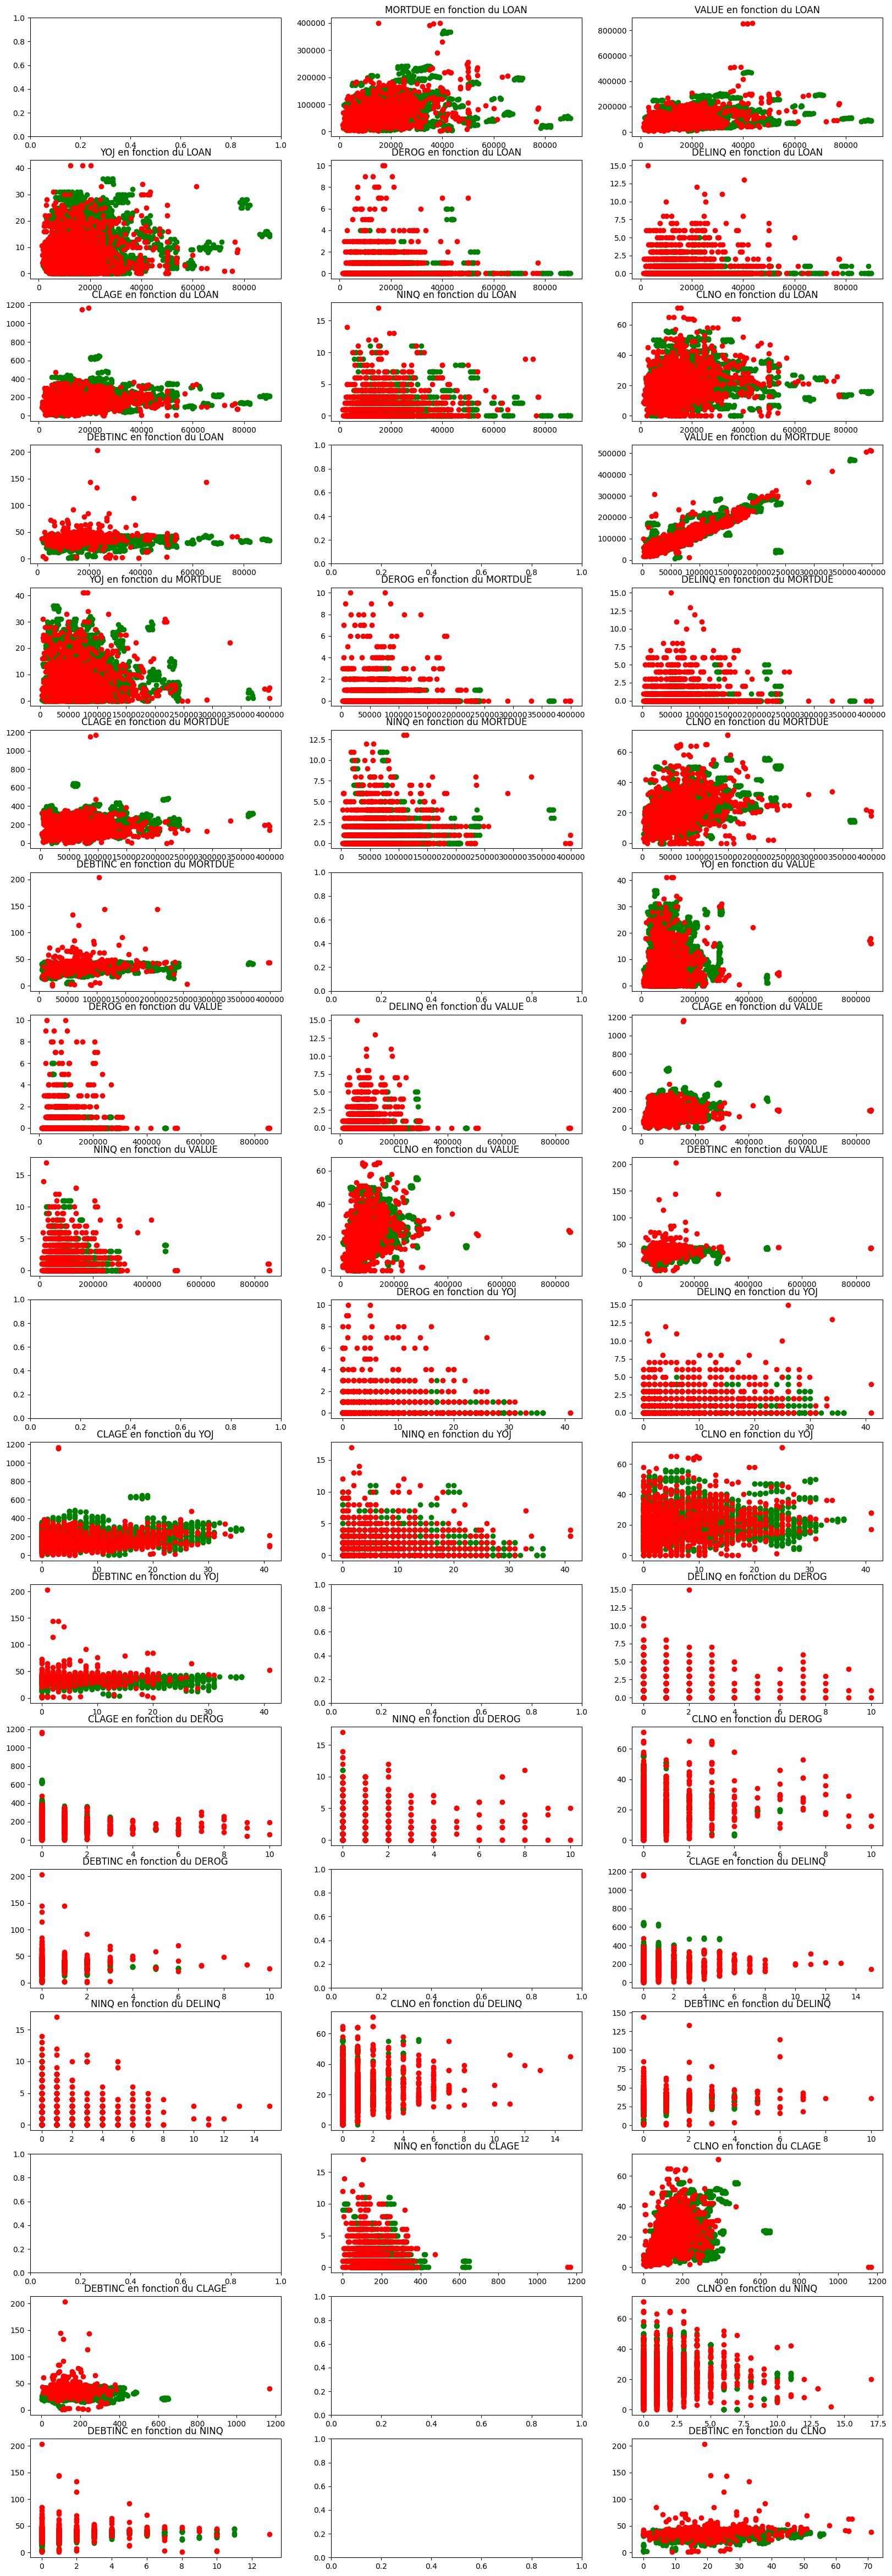

In [8]:
fig, axes = plt.subplots(18, 3, figsize=(20, 60))

pred_num=data_num.drop(columns=['BAD'])
L1=pred_num.columns
L2=list(pred_num.columns)
i=0
j=0
for var_1 in L1:
    for var_2 in L2 :
        if var_1!=var_2 :
            plot_scatter(var_1,var_2,'BAD',i,j)
        j+=1
        if j==3 :
            i+=1
            j=0
    L2.remove(var_1)
    


# On va maintenant analyser le nombres de valeurs manquantes par colonnes et par lignes 

In [27]:
# Compter les valeurs manquantes par colonne
missing_by_column = data.isnull().sum()
missing_by_column_bad = data[data['BAD'] == 1].isnull().sum()

nombre_lignes=len(data)
print(((missing_by_column/nombre_lignes)*100))

nombre_lignes_bad=len(data[data['BAD'] == 1])
print(((missing_by_column_bad/nombre_lignes_bad)*100))

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64
BAD         0.000000
LOAN        0.000000
MORTDUE     8.915055
VALUE       8.830950
REASON      4.037006
JOB         1.934399
YOJ         5.466779
DEROG       7.317073
DELINQ      6.055509
CLAGE       6.560135
NINQ        6.307822
CLNO        4.457527
DEBTINC    66.105971
dtype: float64


0        1
1        1
2        1
3       11
4        1
        ..
5955     0
5956     0
5957     0
5958     0
5959     0
Length: 5960, dtype: int64


<Axes: xlabel='None'>

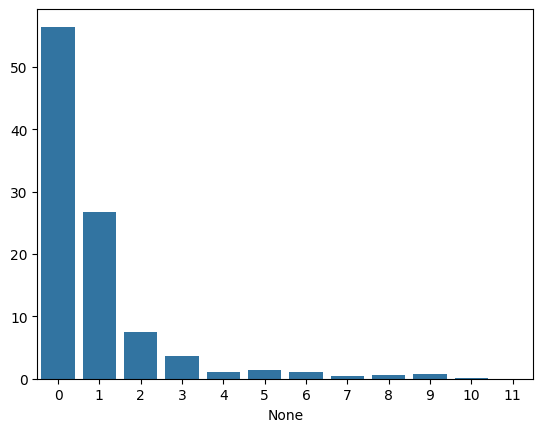

In [10]:
# Compter les valeurs manquantes par ligne
missing_by_row = data.isnull().sum(axis=1)

# Afficher le résultat
print(missing_by_row)

df=((missing_by_row.value_counts())/len(data))*100
sns.barplot(x=df.index,y=df.values)

Pites pour la suite :
- Ne pour l'instant travailler uniquement avec les variables numériques à forte corrélation (derog,delinq,clage,ninc,debtinc)
- Regarder entre eux la colinéarité
- enlever les lignes avec 3 val manquantes ou pls
- imputer le reste par la medianne
- regarder si il est pertinent pour certaines de ces variables de modifier les valeurs prises car certaines fois pas assez de données 

# test avec uniquement les variables à fortes correlation

In [11]:
data_1=data[['DEROG','DELINQ','CLAGE','NINQ','DEBTINC','BAD']]

#On enelève les lignes avec beaucoup de NA 
missing_by_row = data_1.isnull().sum(axis=1)
for i in range(len(missing_by_row)):
    if missing_by_row[i]>=3  :
        data_1=data_1.drop(i)
        

<Axes: >

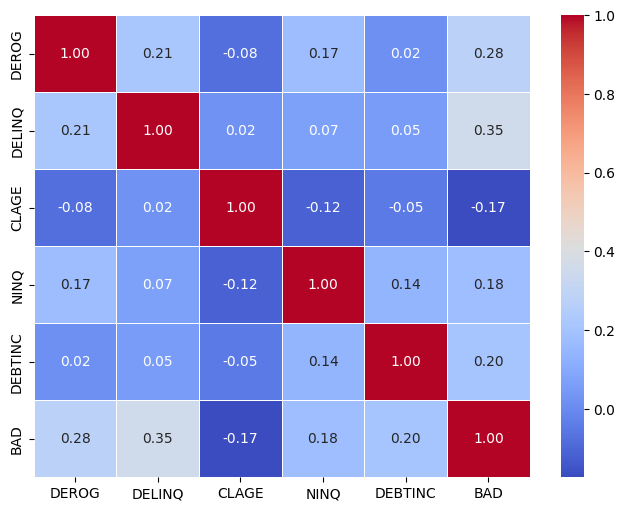

In [12]:
correlation_matrix_1=data_1.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Imputation valeurs manquantes

In [13]:
columns_to_fill = ['DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'DEBTINC']

for column in columns_to_fill:
    data_1[column].fillna(data_1[column].mean(), inplace=True)


/var/folders/y6/zqvy_gz17tv4hs6hyyyf4hyw0000gn/T/ipykernel_34350/2537210273.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_1[column].fillna(data_1[column].mean(), inplace=True)


In [14]:
X = data_1.drop(columns=['BAD'])  # Variables indépendantes
y = data_1['BAD']  # Variable dépendante ou cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:

# Créer une instance du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000)  # max_iter est fixé à 1000 pour s'assurer que l'entraînement converge

# Entraîner le modèle avec les données d'entraînement
logistic_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = logistic_model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8345323741007195
Confusion Matrix:
[[866  30]
 [154  62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       896
           1       0.67      0.29      0.40       216

    accuracy                           0.83      1112
   macro avg       0.76      0.63      0.65      1112
weighted avg       0.82      0.83      0.81      1112



# Test avec nouvelle variable 

<Axes: >

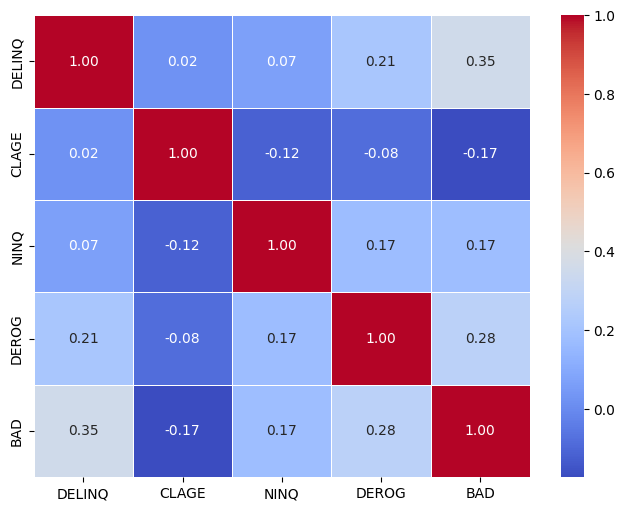

In [32]:
data_2=data[['DELINQ','CLAGE','NINQ','DEROG','BAD']]

data_2.head()

# On enelève les lignes avec beaucoup de NA 
missing_by_row = data_2.isnull().sum(axis=1)
for i in range(len(missing_by_row)):
    if missing_by_row[i]>=3  :
        data_2=data_2.drop(i)
        
correlation_matrix_2=data_2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [35]:
columns_to_fill = ['DELINQ', 'CLAGE', 'NINQ', 'DEROG']

for column in columns_to_fill:
    data_2[column].fillna(data_2[column].median(), inplace=True)

X = data_2.drop(columns=['BAD'])  # Variables indépendantes
y = data_2['BAD']  # Variable dépendante ou cible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer une instance du modèle de régression logistique
logistic_model_2 = LogisticRegression(max_iter=1000)  # max_iter est fixé à 1000 pour s'assurer que l'entraînement converge

# Entraîner le modèle avec les données d'entraînement
logistic_model_2.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = logistic_model_2.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Afficher les résultats
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8363148479427549
Confusion Matrix:
[[865  20]
 [163  70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       885
           1       0.78      0.30      0.43       233

    accuracy                           0.84      1118
   macro avg       0.81      0.64      0.67      1118
weighted avg       0.83      0.84      0.81      1118



/var/folders/y6/zqvy_gz17tv4hs6hyyyf4hyw0000gn/T/ipykernel_34350/2666457758.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_2[column].fillna(data_2[column].median(), inplace=True)
/var/folders/y6/zqvy_gz17tv4hs6hyyyf4hyw0000gn/T/ipykernel_34350/2666457758.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting